© Credits: 
- https://medium.com/@kenan.r.alkiek/https-medium-com-kenan-r-alkiek-traffic-light-recognition-505d6ab913b1
- https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

## import modules

In [3]:
import os
import numpy as np
from scipy import misc
from scipy import signal
import sys
import random
from random import shuffle
from random import uniform
import zipfile
from collections import OrderedDict
import glob
import time
from PIL import Image
from scipy.signal import convolve2d
from scipy.ndimage.filters import maximum_filter
import imageio
import scipy.ndimage as ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import cv2


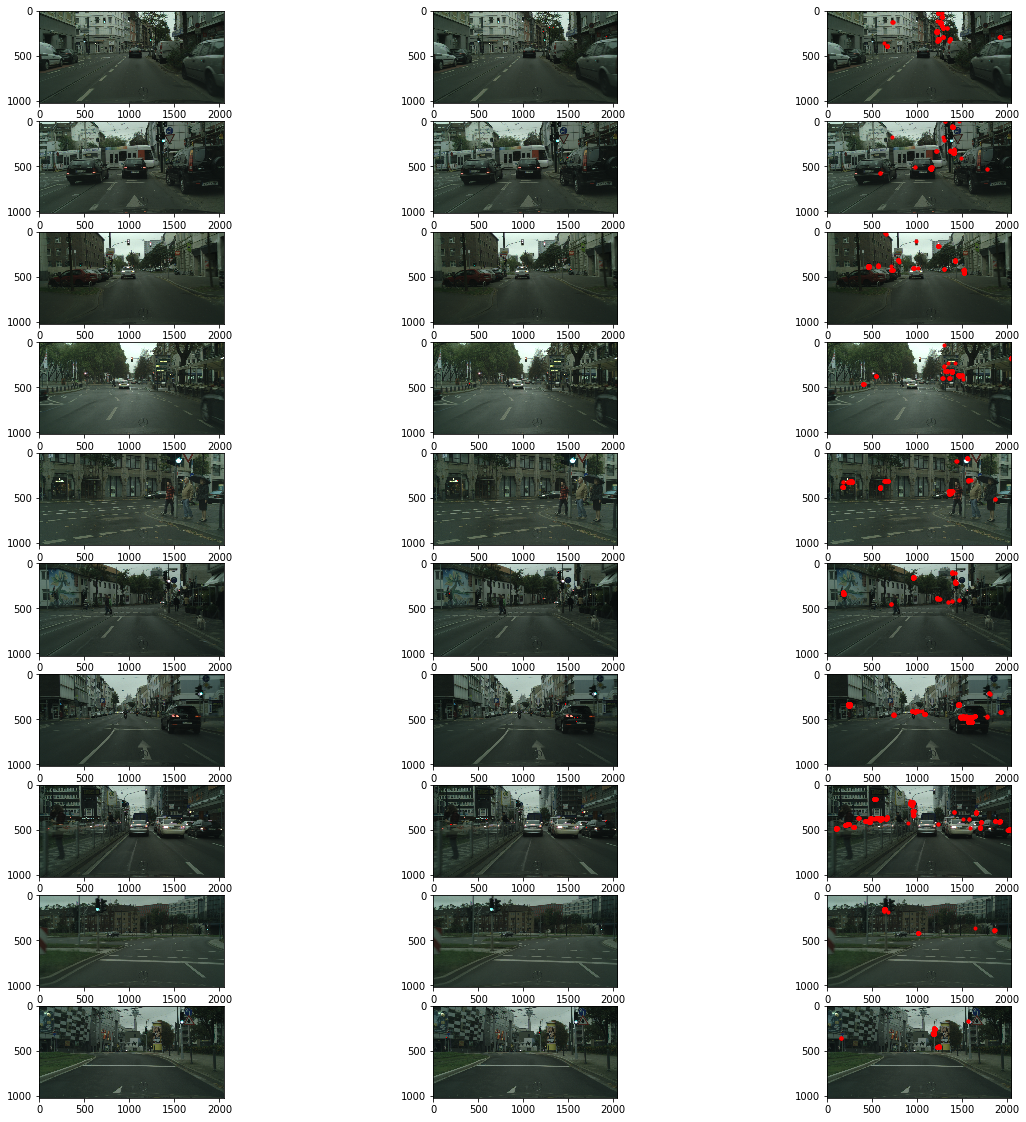

In [11]:
def go_over_file_images(path_ims_dir):
    
    imgs =glob.glob(os.path.join(path_ims_dir, "*.png"))

    fig, axes = plt.subplots(10, 3, figsize=(20,20))
    for i, img in enumerate(imgs):
        src_image = plt.imread(img)
        
        #cropping 40% from the bottom of the image
        index_crop = int(0.60 * src_image.shape[0]) 
        cropped_image = src_image[0 : index_crop]
        plt.plot()
        indices_spots, spotlight_img = do_filters(src_image)
        axes[i,0].imshow(src_image);
        axes[i,1].imshow(spotlight_img);
        axes[i,2].imshow(src_image);
        axes[i,2].plot(indices_spots[:,1],indices_spots[:,0], '.', linewidth=0.5, color='red');
        
def do_filters(src_image):
    
    highpass_filter_img = high_pass_filter(src_image)
    maximum_separation_img = maximum_seperation_filter(highpass_filter_img)

    mask_local_max, indices_spotslights = get_local_maximum(src_image,maximum_separation_img)
    spotlights_img, count_spots = get_image_with_spotlights(src_image,mask_local_max)
    
    return indices_spotslights, spotlights_img

def high_pass_filter(image):
    return ndimage.convolve(image[:,:,1], np.array([[-1/9, -1/9, -1/9],
                                                            [-1/9, 8/9, -1/9],
                                                            [-1/9, -1/9, -1/9]]))


def maximum_seperation_filter(highpass_image, filter_size = 7):
    return ndimage.maximum_filter(highpass_image, size= filter_size)


def get_local_maximum(src_img, maximum_separation_image):
    mask_local_max = (maximum_separation_image > src_img[:,:,1])
    local_max_image = maximum_separation_image * mask_local_max

    # an array with local maximum spot indices
    indices_spots = np.transpose(np.nonzero(mask_local_max))
    return  mask_local_max, indices_spots #local_max_image,


def get_image_with_spotlights(src_img,mask_local_max):
    new_image_with_spots=src_img.copy()
    new_image_with_spots[mask_local_max]=[1,0,0]
    count_spots=np.sum(mask_local_max)
    return new_image_with_spots, count_spots



train_path_ims_dir = r'C:\Users\RENT\Desktop\CityScapes\train_images'
go_over_file_images(train_path_ims_dir)

